# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept = np.ones((data.shape[0], 1))
X = np.column_stack((intercept,data[:, 0:2]))
y = data[:, 2]
y.shape

(100,)

In [4]:
print('X:', X.shape , '\ny:', y.shape)

X: (100, 3) 
y: (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [6]:
def computeCost(X, y, theta):
    h = sigmoid(X.dot(theta))
    #pour eviter -inf de ln(0)
    h[h == 0.] += np.finfo(float).eps
    h[h == 1.] -= np.finfo(float).eps
    
    return - np.sum(((y * np.log(h)) + ((1-y) * np.log(1-h)))) / X.shape[0]

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
    global cost
    for i in range(iterations):
        cost.append(computeCost(X, y.reshape(y.shape[0], 1), theta))
        h = sigmoid(X.dot(theta))
        theta -= (X.T * (h.reshape(h.shape[0]) - y)).sum(axis=1).reshape(X.shape[1], 1) * alpha
    
    return theta

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [8]:
theta = np.zeros((X.shape[1], 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [9]:
computeCost(X, y.reshape(y.shape[0], 1), theta)

0.6931471805599453

Appel des la fonction de calcul du gradient

theta:
 [[-18.37524195]
 [  0.76009086]
 [  0.7327288 ]]
Loss = 0.21238740980599646


Text(0, 0.5, 'Loss')

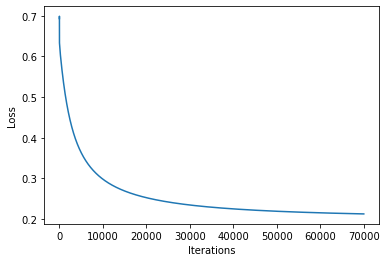

In [10]:
theta = np.zeros((X.shape[1], 1))
cost = []
# paramètres
iterations = 70000
alpha = 0.00025
# Appel
theta = gradientDescent(X, y, theta, alpha, iterations)
print('theta:\n', theta)
print('Loss =', computeCost(X, y.reshape(y.shape[0], 1), theta))
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Loss')

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [11]:
def drawLine():
    print(X.shape)
drawLine()

(100, 3)


# Affichage 
Graphe representant les acceptations selon les caracteristiques

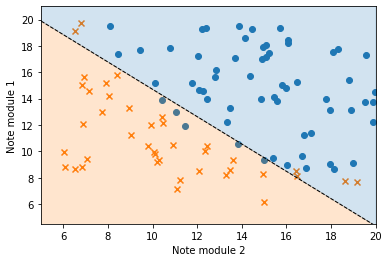

In [12]:
b = theta[0]
w1, w2 = theta[1],theta[2]
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
# Plot the data and the classification with the decision boundary.
xmin, xmax = X[np.where(y == 1), 1].shape[0], 20
ymin, ymax = X[np.where(y == 1), 2].shape[0], 21
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.scatter(X[np.where(y == 1), 1], X[np.where(y == 1), 2], label="accepte", marker ='o')
plt.scatter(X[np.where(y == 0), 1], X[np.where(y == 0), 2], label="non accepte", marker ='x')
plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.xlim(xmin+4, xmax)
plt.ylim(ymin+3.5, ymax)
plt.ylabel('Note module 1')
plt.xlabel('Note module 2')
plt.show()

Traçage du coût en fonction de theta0 et theta1

Text(0, 0.5, 'Loss')

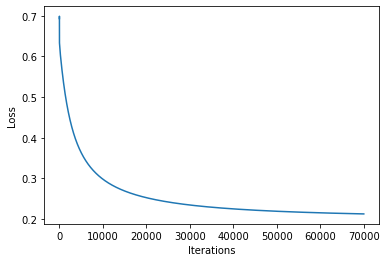

In [13]:
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Loss')

Prédire des valeurs de y

In [14]:
# Predire pour des notes note1= 9 et note2=17
pred_ex=np.array([1.,9.,17.])

prediction = sigmoid(pred_ex.dot(theta))
print('Prediction:', prediction)
if prediction >= 0.5:
    print('1')
else:
    print('0')

h = sigmoid(X.dot(theta))
h[h >= 0.5] = 1
h[h < 0.5] = 0
y_pred = h.reshape(h.shape[0])
our_score= 100 - np.count_nonzero(y_pred - y)

Prediction: [0.71544239]
1


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

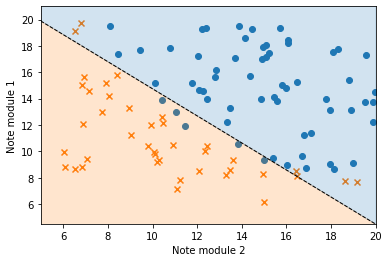

[1.]
[[0.24490641 0.75509359]]
our accuracy:  89
sklearn model accuracy :  89.0


In [15]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, y)
b = clf.intercept_
w1, w2 = clf.coef_.T[1],clf.coef_.T[2]
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
# Plot the data and the classification with the decision boundary.
xmin, xmax = X[np.where(y == 1), 1].shape[0], 20
ymin, ymax = X[np.where(y == 1), 2].shape[0], 21
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.scatter(X[np.where(y == 1), 1], X[np.where(y == 1), 2], label="accepte", marker ='o')
plt.scatter(X[np.where(y == 0), 1], X[np.where(y == 0), 2], label="non accepte", marker ='x')
plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.xlim(xmin+4, xmax)
plt.ylim(ymin+3.5, ymax)
plt.ylabel('Note module 1')
plt.xlabel('Note module 2')
plt.show()
print(clf.predict([[1,9,17]]))
print(clf.predict_proba([[1,9,17]]))
print("our accuracy: ",our_score)
print ("sklearn model accuracy : ", clf.score(X,y)*100)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [16]:
# bonne chance